# Study Site Figure

This notebook generates the mean SST that is used to create the basemap.

In [2]:
import os
from pathlib import Path

import xarray as xr

In [3]:
SAVE_FIGS = False
REPO_ROOT = os.getenv('REPO_ROOT', '/Users/rwegener/repos/journalarticle_chesapeake_mhw')
REPO_ROOT = Path(REPO_ROOT)

In [11]:
sst_filename = 'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc'
path = REPO_ROOT /'data/01_raw' / sst_filename
geopolar = xr.open_dataset(path)
geopolar = geopolar.analysed_sst

geopolar = geopolar - 273.15

In [14]:
geopolar_mean = geopolar.mean('time')

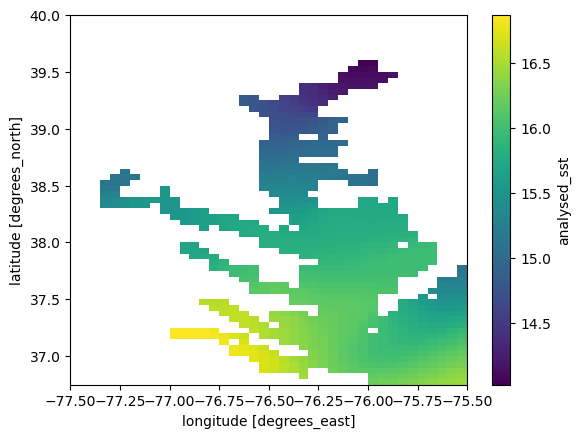

In [15]:
geopolar_mean.plot()

In [18]:
geopolar_mean.rio.write_crs('EPSG:4326', inplace=True)

<xarray.DataArray 'analysed_sst' (lat: 65, lon: 40)>
array([[      nan,       nan,       nan, ..., 16.399944, 16.42735 ,
        16.453413],
       [      nan,       nan,       nan, ..., 16.34816 , 16.377243,
        16.404942],
       [      nan,       nan,       nan, ..., 16.293625, 16.324877,
        16.354729],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat          (lat) float32 36.78 36.83 36.88 36.92 ... 39.88 39.92 39.97
  * lon          (lon) float32 -77.47 -77.43 -77.38 ... -75.62 -75.57 -75.53
    spatial_ref  int64 0

In [21]:
geopolar_mean.rio.to_raster(
    REPO_ROOT / 'data/02_interim' / 'geopolar_mean_SST.tif'
)